# Arboles de Decisión 16QAM

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sofa_sem import add_noise, demapper_sym, bit_error_rate

### Preparación de los datos

In [83]:
Ns = 1000000
Mod = 16 #16QAM
y = np.random.randint(Mod, size=Ns)
df = pd.DataFrame(y, columns=['tx'])
df.head()

,tx
0,11
1,10
2,5
3,6
4,2


In [84]:
# Diccionario con el que se modulan los datos
mod_dict = {0:-3+3j, #0000
            1:-3+1j, #0001
            2:-3-3j, #0010
            3:-3-1j, #0011
            4:-1+3j, #0100
            5:-1+1j, #0101
            6:-1-3j, #0110
            7:-1-1j, #0111
            8:3+3j,  #1000
            9:3+1j,  #1001
            10:3-3j, #1010
            11:3-1j, #1011
            12:1+3j, #1100
            13:1+1j, #1101
            14:1-3j, #1110
            15:1-1j} #1111

In [85]:
df = df.replace(mod_dict)
df.head()

,tx
0,3.0-1.0j
1,3.0-3.0j
2,-1.0+1.0j
3,-1.0-3.0j
4,-3.0-3.0j


### Adición de ruido AWGN para simular un canal real

In [86]:
Xr = np.real(df['tx'])
Xi = np.imag(df['tx'])

In [87]:
# Se generan varias intensidades de ruido AWGN y se agregan a los datos
target_snr_db = [i for i in np.arange(4, 25, 4)]
Xr_ch = [add_noise(Xr, i) for i in target_snr_db]
Xi_ch = [add_noise(Xi, i) for i in target_snr_db]

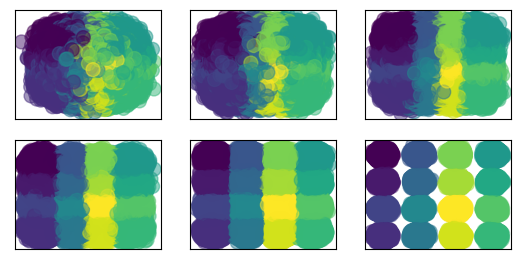

In [88]:
# Grafica de los datos extraidos del canal
for i in range(len(target_snr_db)):
    plt.subplot(3, 3, i + 1)
    plt.scatter(Xr_ch[i], Xi_ch[i], c=y, s=100, marker='o', alpha=0.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Demodulación convencional

In [89]:
# Se demapean los datos extraidos del canal con ruido
sym_rx = [demapper_sym(Xr_ch[i], Xi_ch[i], len(Xr_ch[i]), threshold = 2.0) for i in range(len(target_snr_db))]

In [90]:
ber_conventional = []
for i in range(len(target_snr_db)):
  ser, ser_error = bit_error_rate(y, sym_rx[i])
  ber_conventional.append(ser)

### Demodulación usando el algoritmo Arboles de Decisión

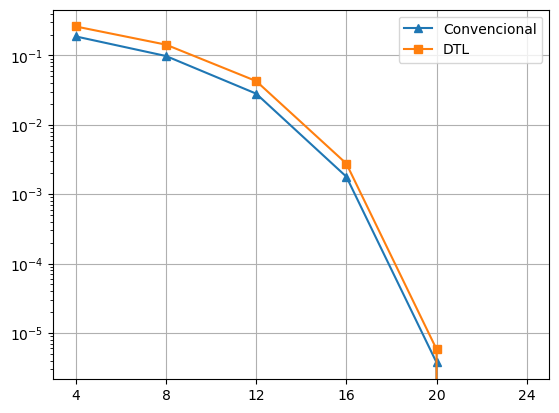

In [91]:
ber_dtl = []
for it, item in enumerate(target_snr_db):
    X = np.transpose(np.array([Xr_ch[it], Xi_ch[it]]))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = DecisionTreeClassifier().fit(X_train, y_train)

    y_pred = model.predict(X_test)

    ber, ber_error = bit_error_rate(y_test, y_pred)
    ber_dtl.append(ber)

plt.plot(target_snr_db, ber_conventional, marker='^', label='Convencional')
plt.plot(target_snr_db, ber_dtl, marker='s', label='DTL')
plt.yscale('log')
plt.xticks(target_snr_db)
plt.legend()
plt.grid()
plt.show()